<a href="https://colab.research.google.com/github/jonahokiru/hello-world/blob/master/Moringa_Dsc14_Core_Machine_Learning_K_nearest_Neighbours(KNN)_Week9_IP_Jonah_Okiru_05_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Define the question.

## a) Specify the data analytic question.

To predict weather the pasenger survived or died given the passengers information.

## b) Define the metric of success.

> To predict if the passenger survived or died with the accuracy score of 80%.

### c) Understanding the context.

The titanic data frame describe the survival status of individual passengers
on the Titanic. The titanic data frame does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic:Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay. The variables on our extracted dataset are pclass, survived, name, age, embarked, embarked, room, ticket, boat, and sex.

## d) Record the experimental design.

Hypothesis: Predict the wether the passenger died or survived given the passengers information.

Y- axis: Survived(1=yes, 0=no)

X-axis: class, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked.

Experimental setup: predict wether the passenger survived or not based on the features stated on the X-axis.

Design of the experiment: Analyze the data from 891 passengers.

## e) Relevance of the data.

The provided data had enough number of features and records to aid in the building of the KNN algaorithm.

# 2. Read the data.

In [ ]:
#import the neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#load the data
train=pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')

# 3. Checking the data.

In [ ]:
#Determine the number of records in the dataset
train.shape

(891, 12)

The data set has 891 records and 11 features and one label column.

In [ ]:
#preview of the top of the dataset
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
#Preview of the bottom of the dataset
train.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Check the columns datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The columns datatypes of the datasets are 2 columns(floats), 5 columns(Integer), 5 columns(Objects) respectively.

# 4. External data source validation.

[Link](https://www.kaggle.com/competitions/titanic/data)

# 5. Tidying the data.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


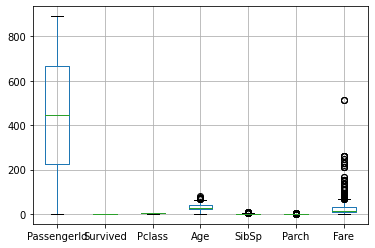

In [ ]:
#Check for the outliers in the data.
train.boxplot()

The above visualizations displays the boxplots of the floats and intenger datatypes features. From the visualizations outliers is detected  in the fare, age, sibsp and parch features.

In [ ]:
#Check for the percentage of missing data in each column of the dataset
train.isnull().sum()/len(train) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

The columns with the missing values are cabin(77% of the values missing), age(19% of the values missing) and embarked(0.225% of the values missing). The other remaining columns does not coontain the any missing values.

In [ ]:
#Dealing with missing data
#For the cabin column since more than 77% of the data is missing, the column would be dropped.
# and for the column of age around 20% of the dataset is missing, since the missing data is only 20% 
# i will replace it with average of the column since the missing data wouldn't have much effect on the data
# and for the embarked column less than 1% of the data is missing, i will replace it with the previous value in the column

#Drop the cabin column
train.drop(['Cabin'], axis=1, inplace =True)

#Replace the missing value of the age column with mean of the age column
train['Age'].fillna(train['Age'].mean(), inplace=True)

#Replace the missing value in the embarked column with previous value in the 
#column.
train['Embarked'].fillna(method='pad', inplace=True)

In [ ]:
#Further data cleaning
#drop the name column and the passenger id columns since they're not needed in the building the model
train.drop(['PassengerId', 'Name'], axis=1, inplace=True)

# 6. Exploratory data Analysis.

## (i)Plot of the univariates.

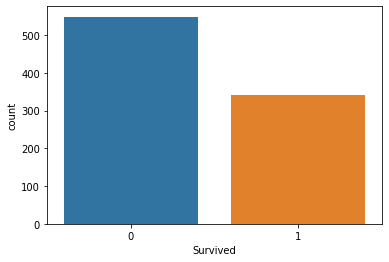

In [ ]:
import seaborn as sns
#Univariate visualization of the passengers who survived, died
sns.countplot(x=train['Survived'], data=train)

From the survived univariate visualization displayed above the number of passengers who died is more than those who survived.

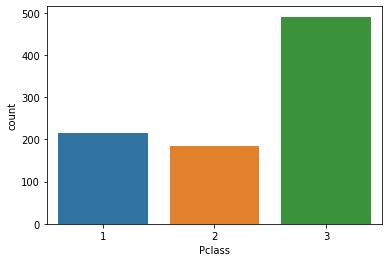

In [ ]:
#Univariate visulization of class
sns.countplot(x=train['Pclass'], data=train)

From the visualization displayed above most of the passengers were from the 3 class, followed by class 1 and class2 respectively.

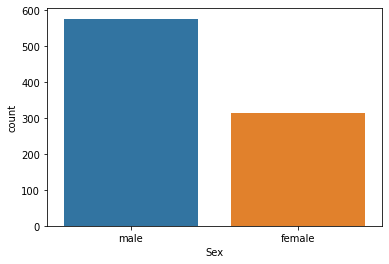

In [ ]:
#univariate visualization of the sex of the passengers
sns.countplot(x=train['Sex'], data=train)

From the visualization , we noted that the majority of the passengers were male.

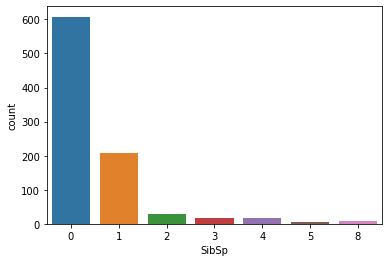

In [ ]:
#univariate visualization of the SibSp
sns.countplot(x=train['SibSp'], data=train)

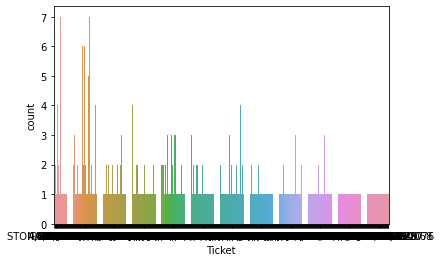

In [ ]:
#Univariate visualization of the tickets
sns.countplot(x=train['Ticket'], data=train)


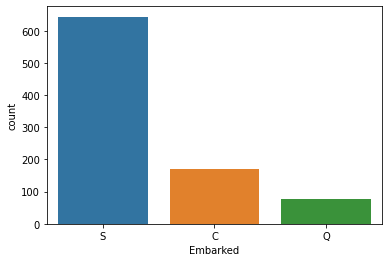

In [ ]:
#Univaraite visualization of Embarked
sns.countplot(x=train['Embarked'], data=train)

From the visualization the S embarked had the highest follwed by c and d respectively.

### (ii)Plot of the bivariates

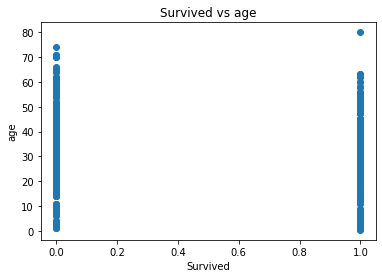

In [ ]:
#Bivariate plot of survived vs age
plt.scatter(x=train['Survived'], y=train['Age'])
plt.title('Survived vs age')
plt.xlabel('Survived')
plt.ylabel('age')
plt.show()

From the bivariate visualization above the age of the customers who survived and those who didn't ranges from 0 to 80 for those who survived and 0 to 75 for those who didn't survived.

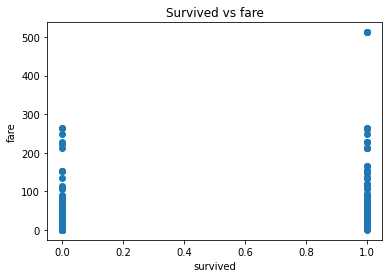

In [ ]:
#Bivariate plot of survived vs fair
plt.scatter(x=train['Survived'], y= train['Fare'])
plt.title('Survived vs fare')
plt.xlabel('survived')
plt.ylabel('fare')
plt.show()

From the bivariate visualization we can conclude that the majority of the passengers who lost there lives they had pay the fare of less than $200.

### (iii)Features reduction.

In [ ]:
#Change the categorical variables to numericals using label encoding
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
train['Sex'] = labelencoder.fit_transform(train['Sex'])
train['Ticket'] = labelencoder.fit_transform(train['Ticket'])
train['Embarked'] = labelencoder.fit_transform(train['Embarked'])


Conversion of categorical variables from objects to numericals is importance since machine learning models only identify numerical values.

In [ ]:
#Split the data into response variable y and predictor varaiable X(The features).
X= train.drop(['Survived'], axis=1).values
y= train['Survived'].values

In [ ]:
#Apply the PCA reduction technique on the predictor variable X to reduce the number of feautres to 2.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalComponents

array([[ 184.59526876,  -24.4491308 ],
       [ 257.28461942,   40.26959423],
       [ 330.57169931,  -23.12120276],
       ...,
       [ 336.49868257,   -7.47506798],
       [-330.50007502,   -3.53626411],
       [ 127.54918297,  -23.91121514]])

PCA helps in reducing the size of the features so that KNN models can classify the models clases with high level of accuracy.

# 7. Implementing the solution.

### (i). randomly partioning the dataset into 80-20 sets.

In [ ]:
#Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2)


Splitting the data into test and training set helps in avoididng overfitting, as it gives us the idea on how the algorithm performs on the testing face, since the algorathm is tested on unseen data.






In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler= scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Since KNN models is the distanced based algorithm, scaling of the features is importance as it helps all the features to contribute equally in the generations of the final results.

Minimum error:- 0.19553072625698323 at K = 2


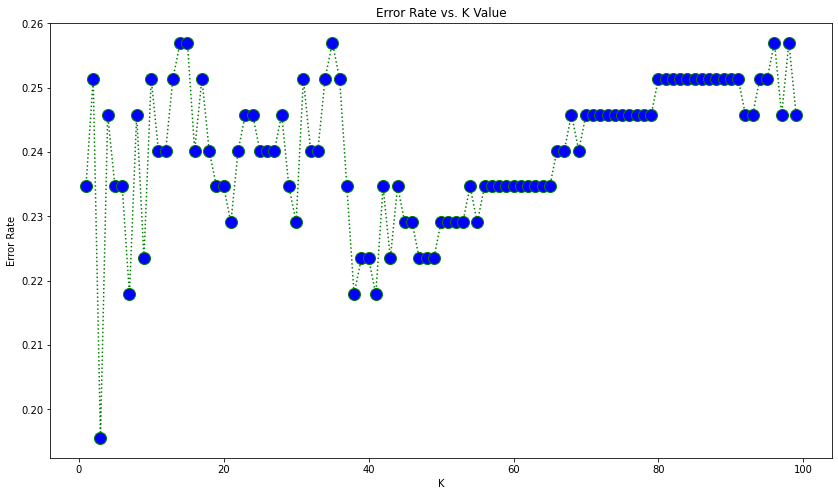

In [ ]:
#Find the optimal k value for the kNeighbors claffier.
error_rate = []
for j in range(1,100):
 knn = KNeighborsClassifier(n_neighbors=j)
 knn.fit(X_train,y_train)
 pred_j = knn.predict(X_test)
 error_rate.append(np.mean(pred_j != y_test))

plt.figure(figsize=(14,8))
plt.plot(range(1,100),error_rate,color='green', linestyle='dotted', 
         marker='o',markerfacecolor='blue', markersize=12)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

The above codes finds the optimal value of k , that will be used by the algorithm when classifying the classes based on the votes of it's neighbors.

In [ ]:
#Training and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [ ]:
#The prediction
y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

Test the performance of the model by passing the test set of the data through it .

In [ ]:
#Evaluate the alogarithm using classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7486033519553073
[[95  5]
 [40 39]]
              precision    recall  f1-score   support

           0       0.70      0.95      0.81       100
           1       0.89      0.49      0.63        79

    accuracy                           0.75       179
   macro avg       0.80      0.72      0.72       179
weighted avg       0.78      0.75      0.73       179



With the split of the data into 80-20 set, the accuracy score of the model achieved is 75%,the true positive and negative of the model is 95 and 39 respectively. While the true negative and positive of the model is 40 and 5 respectively, with the k(n_neighbors)=2, and metric= euclidean.

### (ii). Randomly partioning the data into 70-30 sets.

In [ ]:
#Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=2)

Splitting the data into test and training set helps in avoididng overfitting, as it gives us the idea on how the algorithm performs on the testing face, since the algorathm is tested on unseen data.

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler= scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Since KNN models is the distanced based algorithm, scaling of the features is importance as it helps all the features to contribute equally in the generations of the final results.

In [ ]:
#Training and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [ ]:
#The prediction
y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1])

Test the performance of the model by passing the test set of the data through it 

In [ ]:
#Evaluate the alogarithm using classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7611940298507462
[[151   9]
 [ 55  53]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.83       160
           1       0.85      0.49      0.62       108

    accuracy                           0.76       268
   macro avg       0.79      0.72      0.72       268
weighted avg       0.78      0.76      0.74       268



With the split of the data into 70-30 set, the accuracy score of the model is 76%,the true positive and negative increased  of the model increased to  151 and 53 respectively. While the flase positive and negative also increased to 55 and 9 respectively, with the k(n_neighbors)=2, and metric= euclidean.

### (iii). Randomly partioning the data into 60-40 sets.

In [ ]:
#Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.4, random_state=2)

Splitting the data into test and training set helps in avoiding overfitting, as it gives us the idea on how the algorithm performs on the testing face, before the algorathm is tested on unseen data.

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler= scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Since KNN models is the distanced based algorithm, scaling of the features is importance as it helps all the features to contribute equally in the generations of the final results.

In [ ]:
#Training and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [ ]:
#The prediction
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

Test the performance of the model by passing the test set of the data through it 

In [ ]:
#Evaluate the alogarithm using classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7591036414565826
[[197  12]
 [ 74  74]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       209
           1       0.86      0.50      0.63       148

    accuracy                           0.76       357
   macro avg       0.79      0.72      0.73       357
weighted avg       0.78      0.76      0.74       357



With the split of the data into 60-40 set, the accuracy score of the model is 76%,the true positive and negative increased to  197 and 74 respectively, While the false positive and negative is 74 and 12 respectively, with the k(n_neighbors)=2, and metric= euclidean.

The KNN model performnce can further be improved by properly splitting the data into a proper test size. The test size should properly selected so that to avoid overfitting hence inaccurate models. From the classifications above it has been clearly noted accuracy score increases with the increase in test size, as the test size increases, the the size of the training data decreases, thus making the model to have less data to learn from, hence making model to shift its classification towards overfitting during the test .

# 8. Challenging the solution.

Even though the model managed to achieve the high accuracy scores it still failed to achieve the set metric of success score of 80%. which posses the question about the effectiveness of the model in the prediction the data.

# 9. Follow up question.

### a) Do we have the right data.

Yes, the data was appropriate, since it had enough number of features to be used in building of the model.

### b) Do we need another data to answer the question.

No, we don't need another data to answer the question the provided data was appropriate for the project.

### c) Do we have the right question.

Yes, the question was appropriate.